In [88]:
%matplotlib inline
# I am leaving these libraries here for potential exploration in the future
import re
import pandas as pd
import time
import requests
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sbn
import textatistic
import string
import textblob
from wordcloud import *
import datetime
from datetime import datetime
from nltk import tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
matplotlib.style.use('ggplot')
import psycopg2
py.offline.init_notebook_mode()

In [89]:
elon = pd.read_csv("data_elonmusk.csv",encoding="latin1")

In [90]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from      User  
0  2017-09-29 17:39:19          NaN  elonmusk  
1  2017-09-29 10:44:54       SpaceX  elonmusk  
2  2017-09-29 10:39:57          NaN  elonmusk  
3  2017-09-29 09:56:12          NaN  elonmusk  
4  2017-09-29 09:19:21          NaN  elonmusk

### Dropping the user colomn since all the tweets are by Elon

In [91]:
elon= elon.drop(["User"],axis=1)

In [92]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  
0  2017-09-29 17:39:19          NaN  
1  2017-09-29 10:44:54       SpaceX  
2  2017-09-29 10:39:57          NaN  
3  2017-09-29 09:56:12          NaN  
4  2017-09-29 09:19:21          NaN

In [93]:
translator = str.maketrans({key: None for key in string.punctuation if key != '@'})
def cleanText(description):
    description = description.lower()
    description = description.translate(translator)
    description = re.sub(r'\b\w\b', '', description)
    return description

In [94]:
elon['Tweet_cleaned_with_at'] = elon.Tweet.map(cleanText)

In [95]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  
0  @meltingice assuming max acceleration of  to  ...  
1  rt @spacex bfr is capable of transporting sate...  
2                                       @bigajm yup   
3                           part  httpstco8fvu57muhm  
4  fly to most places on earth in under 30 mins a...

### Who does Elon mention or tweet to in his tweets the most? 

In [96]:
a = []
for i in elon.Tweet_cleaned_with_at:
    i = i.split()
    for item in i:
        if item.startswith('@'):
            a.append(item)

In [97]:
dictionary = {}
for item in a:
    if item not in dictionary:
        dictionary[item] = 1 
    else: 
        dictionary[item] +=1
    
        


In [98]:
mention = pd.DataFrame()
mention["Mention"]= dictionary.keys()
mention["Count"]= dictionary.values()

In [99]:
mention= mention.sort_values(by=["Count"],ascending= False).reset_index(drop=True)

In [100]:
mention.head()

Mention  Count
0        @spacex    185
1   @teslamotors    180
2      @elonmusk     80
3          @nasa     39
4  @spacestation     26

### Breaking down the timing of the tweets

### Popular tweets per year

In [101]:
def year(y):
    y = y[ :4]
    return y 

def month(m):
    m = m[ 5:7]
    return m 

def day(d):
    d = d[ 8:10]
    return d
def hour(h):
    h = h[ 11:13]
    return h

In [102]:
elon["Year"] = elon.Time.map(year)
elon["Month"] = elon.Time.map(month)
elon["Day"] = elon.Time.map(day)
elon["Hour"] = elon.Time.map(hour)

In [103]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year Month Day Hour  
0  @meltingice assuming max acceleration of  to  ...  2017    09  29   17  
1  rt @spacex bfr is capable of transporting sate...  2017    09  29   10  
2                                       @bigajm yup   2017    09  29   10  
3                           part  httpstco8fvu57muhm  2017    09  29   09  
4  fly to most places on earth in under 30 mins a...  2017    09  29   09

In [104]:
elon['AM_PM']= ""

In [105]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year Month Day Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017    09  29   17   
1  rt @spacex bfr is capable of transporting sate...  2017    09  29   10   
2                                       @bigajm yup   2017    09  29   10   
3                           part  httpstco8fvu57muhm  2017    09  29   09   
4  fly to most places on earth in under 30 mins a...  2017    09  29   09   

  AM_PM  
0        
1        
2        
3        
4

In [106]:
elon[['Year', 'Month','Day','Hour']] = elon[['Year', 'Month','Day','Hour']].apply(pd.to_numeric)

In [107]:
elon.dtypes

row ID                   object
Tweet                    object
Time                     object
Retweet from             object
Tweet_cleaned_with_at    object
Year                      int64
Month                     int64
Day                       int64
Hour                      int64
AM_PM                    object
dtype: object

### Adding a column to seperate moring-afternoon and evening tweets

In [108]:
for i, row in elon.iterrows():
    if row['Hour'] >= 18:
        elon.loc[i, 'AM_PM'] = 'Evening'
    else:
        elon.loc[i, 'AM_PM'] = 'Morning-Afternoon'

In [109]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM  
0  Morning-Afternoon  
1  Morning-Afternoon  
2  Morning-Afternoon  
3  Morning-Afternoon  
4  Morning-Afternoon

### How many tweets did Elon tweet per year?

In [110]:
#Using dictionaries:
yr= {}
for item in elon.Year:
    if item not in yr:
        count=1
        yr[item]=count
    else:
        yr[item]+=1
        

In [111]:
yr

{2012: 55, 2013: 479, 2014: 231, 2015: 436, 2016: 934, 2017: 1083}

In [112]:
df_year = pd.DataFrame()

In [113]:
df_year['YEAR'] = yr.keys()
df_year['COUNT'] = yr.values()

In [114]:
df_year.head()

YEAR  COUNT
0  2016    934
1  2017   1083
2  2012     55
3  2013    479
4  2014    231

In [115]:
df_year = df_year.sort_values(by=['YEAR']).reset_index(drop=True)

In [116]:
df_year.head()

YEAR  COUNT
0  2012     55
1  2013    479
2  2014    231
3  2015    436
4  2016    934

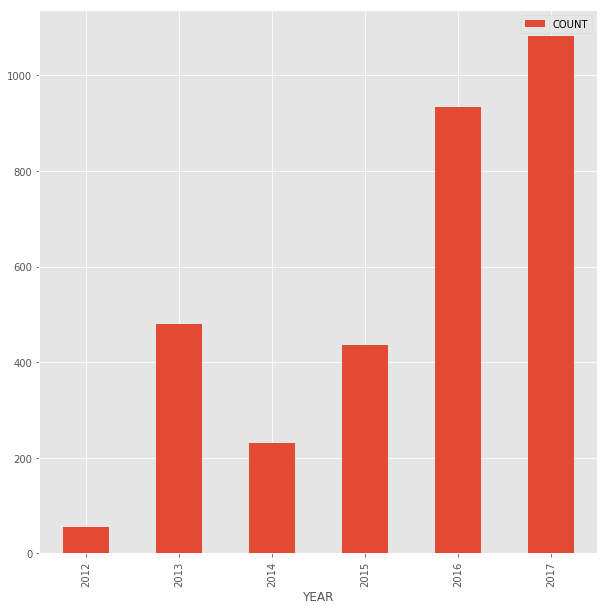

In [117]:
df_year.plot.bar(figsize= (10,10), x= 'YEAR', y='COUNT')

## How many tweets did Elon post per month?

### Using GroupBy instead of Dictionary to count the most popular Month Elon tweeted in

In [118]:
result = elon.groupby(elon.Month)['Month'].count()

In [119]:
df_mnth = pd.DataFrame(result)

In [120]:
df_mnth = df_mnth.rename(columns={'Month':'Count'}).reset_index()

In [121]:
df_mnth.plot.bar(figsize = (10,10), x='Month', y= 'Count')

### How many tweets did Elon tweet per day? and which day is the most popular one?

In [122]:
result = elon.groupby(elon.Day)['Day'].count()

In [123]:
df_day = pd.DataFrame(result)

In [124]:
df_day = df_day.rename(columns={'Day':'Count'}).reset_index()

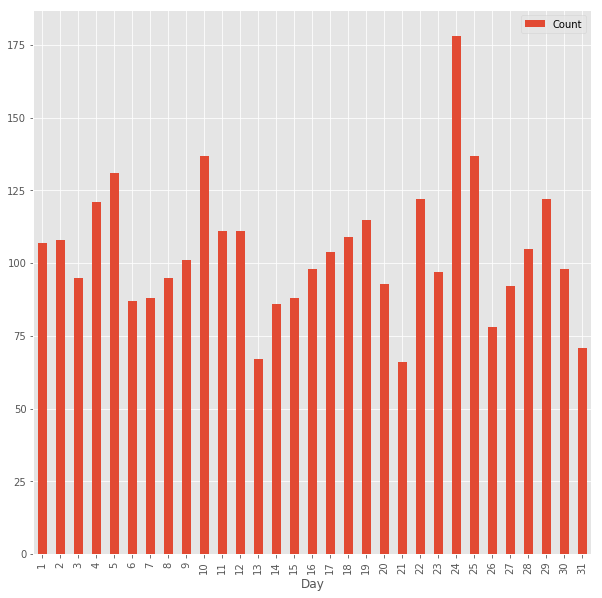

In [125]:
df_day.plot.bar(figsize = (10,10), x='Day', y= 'Count')

### Translating the numeric "days to days of the week":

In [126]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM  
0  Morning-Afternoon  
1  Morning-Afternoon  
2  Morning-Afternoon  
3  Morning-Afternoon  
4  Morning-Afternoon

In [127]:
def time(i):
    i = i[:10]
    return i

In [128]:
elon['DOW'] = ''

In [129]:
elon["Date"]= elon.Time.map(time)

In [130]:
def day_of_the_week(item):
    item = datetime.strptime(item, "%Y-%m-%d").strftime("%A")
    return item

In [131]:
elon['DOW'] = elon.Date.map(day_of_the_week)

In [132]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  
0  Morning-Afternoon  Friday  2017-09-29  
1  Morning-Afternoon  Friday  2017-09-29  
2  Morning-Afternoon  Friday  2017-09-29  
3  Morning-Afternoon  Friday  2017-09-29  
4  Morning-Afternoon  Friday  2017-09-29

In [133]:
result = elon.groupby(elon.DOW)['DOW'].count()

In [134]:
df_dow = pd.DataFrame(result)

In [135]:
df_dow = df_dow.rename(columns={'DOW':'Count'}).reset_index()

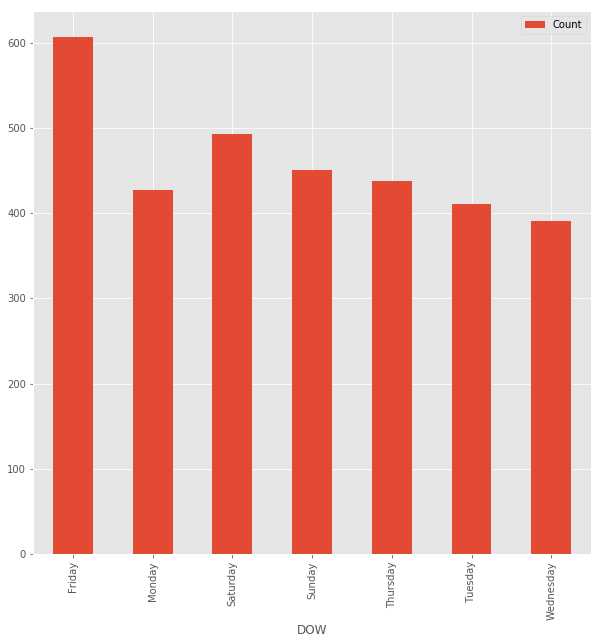

In [136]:
df_dow.plot.bar(figsize = (10,10), x='DOW', y= 'Count')

### What time of the day does Elon tweet the most?

In [137]:
result = elon.groupby(elon.AM_PM)['AM_PM'].count()

In [138]:
df_AM_PM = pd.DataFrame(result)

In [139]:
df_AM_PM = df_AM_PM.rename(columns={'AM_PM':'Count'}).reset_index()

In [140]:
df_AM_PM = df_AM_PM.set_index(['AM_PM'])

In [141]:
df_AM_PM

Count
AM_PM                   
Evening             1212
Morning-Afternoon   2006

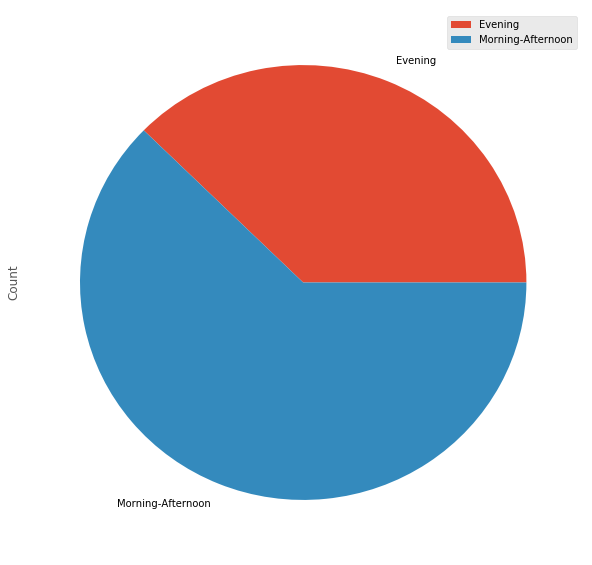

In [142]:
df_AM_PM.plot.pie(figsize = (10,10), x='AM_PM', y= 'Count')

## Tweets Complexity:
### Cleaning data and getting rid of unneccessary figures:
   

In [447]:
translator = str.maketrans({key: None for key in string.punctuation})
def cleanText(description):
    description = description.lower()
    description = description.translate(translator)
    description = re.sub(r'\b\w\b', '', description)
    return description

In [448]:
def tb_score(text):
    res=textblob.TextBlob(text)
    return res.sentiment.polarity

def tb_score_sub(text):
    res=textblob.TextBlob(text)
    return res.sentiment.subjectivity

In [449]:
def drop_http_and_at(item):
    item = item.split()
    for i in item:
        if i.startswith('http') or i.startswith('@'):
            item.remove(i)
    item = ' '.join(item)
    return item

In [450]:
elon['Tweet_without_http_and_at'] = elon.Tweet.map(drop_http_and_at)

In [451]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  \
0  Morning-Afternoon  Friday  2017-09-29   
1  Morning-Afternoon  Friday  2017-09-29   
2  Morning-Afternoon  Friday  2017-09-29   
3  Morning-Afternoon  Friday  2017-09-29   
4  Morning-Afternoon  Friday  2017-09-29   

                           Tweet_without_http_and_at  \
0  Assuming max acceleration of 2 to 3 g's, but i...   
1  RT BFR is capable of transporting satellites t...   
2                                             Yup :)   
3                                             Part 2   
4  Fly to most places on Earth in under 30 mins a...   

                                      cleaned_tweets  tb_score  
0  assuming max acceleration of  to  gs but in  c...  0.366667  
1  rt bfr is capable of transporting satellites t...  0.200000  
2                                               yup   0.000000  
3                                              part   0.000000  
4  fly to most places on earth in under 30 mins a...  0.650000

In [148]:
elon["cleaned_tweets"]= elon.Tweet_without_http_and_at.map(cleanText)

In [149]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  \
0  Morning-Afternoon  Friday  2017-09-29   
1  Morning-Afternoon  Friday  2017-09-29   
2  Morning-Afternoon  Friday  2017-09-29   
3  Morning-Afternoon  Friday  2017-09-29   
4  Morning-Afternoon  Friday  2017-09-29   

                           Tweet_without_http_and_at  \
0  Assuming max acceleration of 2 to 3 g's, but i...   
1  RT BFR is capable of transporting satellites t...   
2                                             Yup :)   
3                                             Part 2   
4  Fly to most places on Earth in under 30 mins a...   

                                      cleaned_tweets  
0  assuming max acceleration of  to  gs but in  c...  
1  rt bfr is capable of transporting satellites t...  
2                                               yup   
3                                              part   
4  fly to most places on earth in under 30 mins a...

In [150]:
elon["tb_score"]=elon.cleaned_tweets.map(tb_score)

In [151]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  \
0  Morning-Afternoon  Friday  2017-09-29   
1  Morning-Afternoon  Friday  2017-09-29   
2  Morning-Afternoon  Friday  2017-09-29   
3  Morning-Afternoon  Friday  2017-09-29   
4  Morning-Afternoon  Friday  2017-09-29   

                           Tweet_without_http_and_at  \
0  Assuming max acceleration of 2 to 3 g's, but i...   
1  RT BFR is capable of transporting satellites t...   
2                                             Yup :)   
3                                             Part 2   
4  Fly to most places on Earth in under 30 mins a...   

                                      cleaned_tweets  tb_score  
0  assuming max acceleration of  to  gs but in  c...  0.366667  
1  rt bfr is capable of transporting satellites t...  0.200000  
2                                               yup   0.000000  
3                                              part   0.000000  
4  fly to most places on earth in under 30 mins a...  0.650000

### What are the negative tweets that were tweeted by Elon?

In [482]:
ng_twt =pd.DataFrame()

In [483]:
for i, row in elon.iterrows():
    if row['tb_score'] < 0:
        ng_twt.loc[i, 'neg_tweet'] = row['cleaned_tweets']

In [484]:
ng_twt = ng_twt.reset_index(drop=True)

In [485]:
ng_twt

neg_tweet
0    bfr will take you anywhere on earth in less th...
1                                      moon base alpha
2    prev ideas for paying 10b dev cost incl kickst...
3    def not ok just sent  reminder to tesla stores...
4                  promise to be as boring as possible
5    rt hackers have already started to weaponize a...
6    sorry about that youre right  was depressing m...
7    we took the spacextesla hyperloop pusher pod f...
8                  boringcompany not sure but probably
9    moon base alpha cheesy show but  loved it plus...
10   richardfpenn not that this is remotely equiv t...
11    model  in the boring company tunnel being dug...
12   sorry coming next year along with completing t...
13   hyperloop paradigmhype spacex and the boring c...
14       tesla does not really have ttunes thats  joke
15   will be hanging with my little chum gary on su...
16   jmackin2 wsj has been laboriously negative for...
17             it is approximately the size of  carrot
18   touchdown vertical velocity ms 147 lateral vel...
19    midnight amendment followed by  vigorously op...
20   yeah its kinda disgusting but my boys and  lov...
21   rt tesla unlocks level  referral program prize...
22   technology im not coming for anything just dig...
23   but you can check it out on btw this isnt  vid...
24   ericgarcetti yes just that the permitting proc...
25   spacex the danger is def high for south korea ...
26   12th mission of our dragon robotic space freig...
27   one other id like to correct from the biograph...
28                                 it gets really dark
29   ericdiepeveen maybe not medically tho dunno ba...
..                                                 ...
389  teslamotors please contact dmv commissioner an...
390  archforhumanity we have  lot of heavy lifting ...
391  stay tuned for  big supercharger announcement ...
392  which leads me to my next subject of gun contr...
393  no more political comments for me now that ive...
394  when  person dies the right thing to do is rem...
395  gronnbilnorge we are working hard to make that...
396  should be late 2014 for us and early 2015 for ...
397                              sorry correct link is
398  slight change of date to ensure no end of quar...
399  theres crazy theres batsht crazy then theres n...
400  testing separation of f9 rocket fairing can ho...
401  arrived austin talking with tx house about cre...
402  thruster pods one through four are now operati...
403  holding on solar array deployment until at lea...
404   minus 22 mins to launch mission  to dock with...
405  rt about to head home in our 2013 model   wont...
406  rt 126 miles to our hotel in boston game over ...
407  rt cnn retests the route rt not that hard at m...
408  tesla blog coming soon detailing what actually...
409  nytimes article about tesla range in cold is f...
410  wow 180000 american killed by other americans ...
411    single camera view of the 40 meter rocket hover
412  to provide  little perspective on the size of ...
413  roughly equivalent to  747 flight from la to l...
414  exactly mt imho continuing the uncontrolled ex...
415  it is hard to argue with  thermometer global w...
416  rt new government study says we could save bil...
417  and yes  do in fact know that this sounds craz...
418  mass judge denies auto dealers demand to kill ...

[419 rows x 1 columns]

### How many negative tweets did Elon post?

In [156]:
ng_twt.count()

neg_tweet    419
dtype: int64

### What are the positive tweets posted by Elon?

In [157]:
pos_twt =pd.DataFrame()

In [158]:
for i, row in elon.iterrows():
    if row['tb_score'] > 0:
        pos_twt.loc[i, 'pos_tweet'] = row['cleaned_tweets']

In [159]:
pos_twt = pos_twt.reset_index(drop=True)

In [160]:
pos_twt.head(20)

pos_tweet
0   assuming max acceleration of  to  gs but in  c...
1   rt bfr is capable of transporting satellites t...
2   fly to most places on earth in under 30 mins a...
3   rt supporting the creation of  permanent selfs...
4   will be announcing something really special at...
5   rt nine years ago today falcon  became the fir...
6                     mayemusk congrats mom  love you
7   rt covergirl im so excited to say that im now ...
8   headed to adelaide soon to describe new bfr pl...
9   good nyt article from several years ago about ...
10                                               good
11  major improvements  some unexpected applicatio...
12  nathanbomey thats not  lot of money for  giant...
13  rt shocking winner of our latest worlds greate...
14  dont give up if the cause is important enough ...
15  absolutely moreover we expect to expand the fa...
16                                high res version at
17                                         most of it
18  long road to reusabity of falcon  primary boos...
19  tesla semi truck unveil  test ride tentatively...

### How many positive tweets did Elon tweet?

In [161]:
pos_twt.count()

pos_tweet    1527
dtype: int64

### What are the most words used in negative tweets?

In [162]:
sw = set(stopwords.words())

In [163]:
patt = re.compile(r'rt|would|tesla|model|car|rocket|launch')

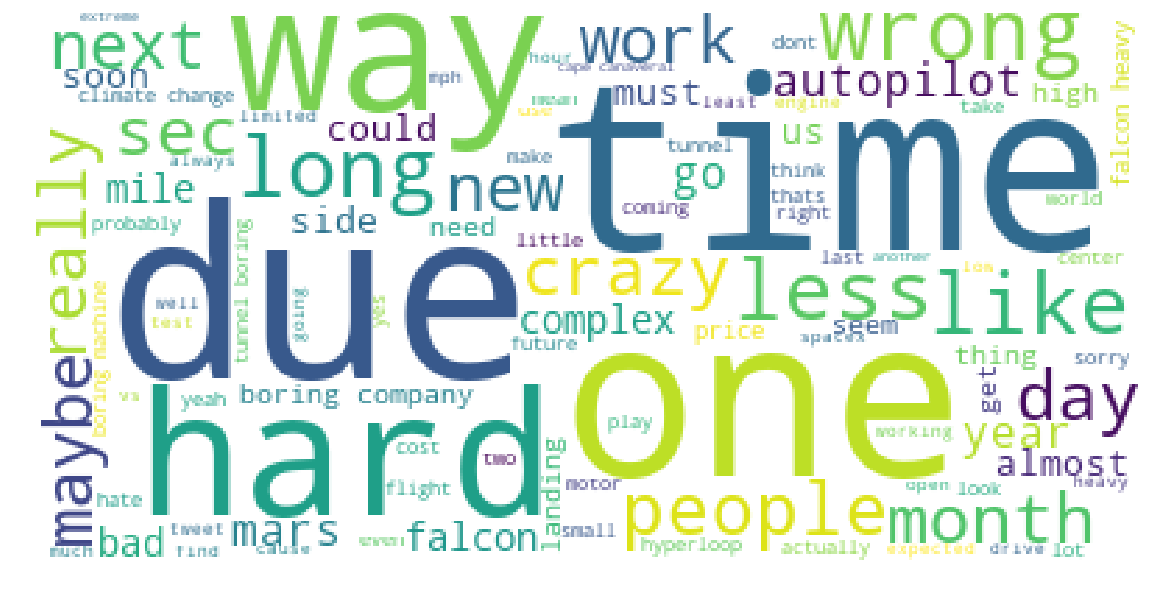

In [164]:
fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(ng_twt.neg_tweet)))



ax.axis('off')
ax.imshow(wcp)

### What are the most words used in positive tweets?

In [165]:
patt = re.compile(r'rt|would|tesla|model|car|rocket|launch')

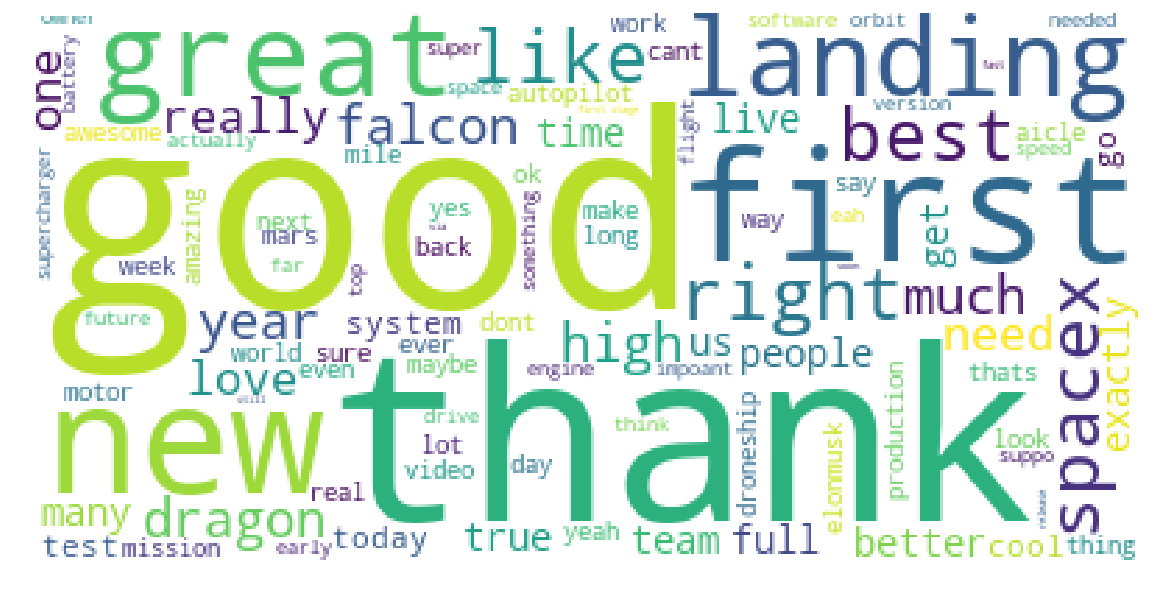

In [166]:
fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(pos_twt.pos_tweet)))



ax.axis('off')
ax.imshow(wcp)

## Thesis Question: What makes Elon's companies so successful? and how does he use twitter to help him grow his business and vision? 

### We would start by examining Which  of Elon's companies does he mention, tweet about the most and Why?

In [169]:
mention.head(10)

Mention  Count
0           @spacex    185
1      @teslamotors    180
2         @elonmusk     80
3             @nasa     39
4     @spacestation     26
5           @openai     21
6  @fredericlambert     20
7      @idaacarmack     17
8       @electrekco     16
9            @wired     15

### Surprisingly, he only mentions Spacex and Tesla. Now I want to know which of those two companies does he tweet positively and negatively the most? 

## Analyzing Tesla Tweets:

In [457]:
elon_Tesla = elon[elon.Tweet.str.contains("tesla")]

### Positive Tweets about Tesla

In [458]:
elon_Tesla

row ID                                              Tweet  \
60      Row60  RT @karpathy: We're hiring strong ML/CV/Roboti...   
684    Row684  @JudeBurger @realamberheard @teslaownersau Wil...   
720    Row720           @tesla_addict @TeslaMotors Working on it   
915    Row915  @christesla @FredericLambert Almost there. We ...   
2075  Row2075  Ramping up the Autopilot software team at Tesl...   
2090  Row2090  RT @bonnienorman: Huge tree lands on #Tesla Mo...   
2126  Row2126  RT @EcoWatch: Colbert: I Woke Up Yesterday Mor...   
2663  Row2663  RT @wendelljopson: There's a rally against ant...   
2693  Row2693  RT @bonnienorman: @teslaMotors @elonmusk Santa...   
2768  Row2768  Engineers interested in working on autonomous ...   
2942  Row2942  @DouglasBullard @teslamotors Most people have ...   
2943  Row2943  @flyguynscc @teslamotors yes, that has been th...   
2968  Row2968                   @realbhuwan @teslamotors Cool :)   
3131  Row3131  RT @Benioff: @elonmusk's @teslamotors model S ...   

                     Time   Retweet from  \
60    2017-08-31 01:01:20       karpathy   
684   2017-04-24 06:48:58            NaN   
720   2017-03-31 22:18:42            NaN   
915   2017-02-05 20:30:43            NaN   
2075  2015-11-20 03:35:59            NaN   
2090  2015-10-27 00:58:25   bonnienorman   
2126  2015-10-16 18:24:59       EcoWatch   
2663  2014-02-17 22:45:32  wendelljopson   
2693  2013-12-12 07:38:58   bonnienorman   
2768  2013-09-19 01:11:25            NaN   
2942  2013-05-05 05:51:06            NaN   
2943  2013-05-05 05:21:47            NaN   
2968  2013-05-01 20:44:55            NaN   
3131  2013-02-15 10:05:56        Benioff   

                                  Tweet_cleaned_with_at  Year  Month  Day  \
60    rt @karpathy were hiring strong mlcvroboticist...  2017      8   31   
684   @judeburger @realamberheard @teslaownersau wil...  2017      4   24   
720             @teslaaddict @teslamotors working on it  2017      3   31   
915   @christesla @fredericlambert almost there we a...  2017      2    5   
2075  ramping up the autopilot software team at tesl...  2015     11   20   
2090  rt @bonnienorman huge tree lands on tesla mode...  2015     10   27   
2126  rt @ecowatch colbert  woke up yesterday mornin...  2015     10   16   
2663  rt @wendelljopson theres  rally against antite...  2014      2   17   
2693  rt @bonnienorman @teslamotors @elonmusk santa ...  2013     12   12   
2768  engineers interested in working on autonomous ...  2013      9   19   
2942  @douglasbullard @teslamotors most people have ...  2013      5    5   
2943  @flyguynscc @teslamotors yes that has been the...  2013      5    5   
2968                     @realbhuwan @teslamotors cool   2013      5    1   
3131  rt @benioff @elonmusks @teslamotors model  is ...  2013      2   15   

      Hour              AM_PM        DOW        Date  \
60       1  Morning-Afternoon   Thursday  2017-08-31   
684      6  Morning-Afternoon     Monday  2017-04-24   
720     22            Evening     Friday  2017-03-31   
915     20            Evening     Sunday  2017-02-05   
2075     3  Morning-Afternoon     Friday  2015-11-20   
2090     0  Morning-Afternoon    Tuesday  2015-10-27   
2126    18            Evening     Friday  2015-10-16   
2663    22            Evening     Monday  2014-02-17   
2693     7  Morning-Afternoon   Thursday  2013-12-12   
2768     1  Morning-Afternoon   Thursday  2013-09-19   
2942     5  Morning-Afternoon     Sunday  2013-05-05   
2943     5  Morning-Afternoon     Sunday  2013-05-05   
2968    20            Evening  Wednesday  2013-05-01   
3131    10  Morning-Afternoon     Friday  2013-02-15   

                              Tweet_without_http_and_at  \
60    RT We're hiring strong ML/CV/Roboticists for t...   
684   @realamberheard Will definitely do that on my ...   
720                          @TeslaMotors Working on it   
915   @FredericLambert Almost there. We are just bei...   
2075  Ramping up the Autopilot so

In [459]:
pos_twt =pd.DataFrame()

In [460]:
for i, row in elon_Tesla.iterrows():
    if row['tb_score'] >0:
        pos_twt.loc[i, 'pos_tweet'] = row['cleaned_tweets']

In [461]:
pos_twt = pos_twt.reset_index(drop=True)

In [462]:
pos_twt.head()

pos_tweet
0  rt were hiring strong mlcvroboticists for the ...
1  ramping up the autopilot software team at tesl...
2  rt huge tree lands on tesla model  occupants p...
3  rt theres  rally against antitesla bills hb252...
4  rt teslamotors santa came early this year for ...

In [463]:
pos_twt.count()

pos_tweet    9
dtype: int64

In [383]:
patt = re.compile(r'rt|would|spacex|model|car|rocket|launch')

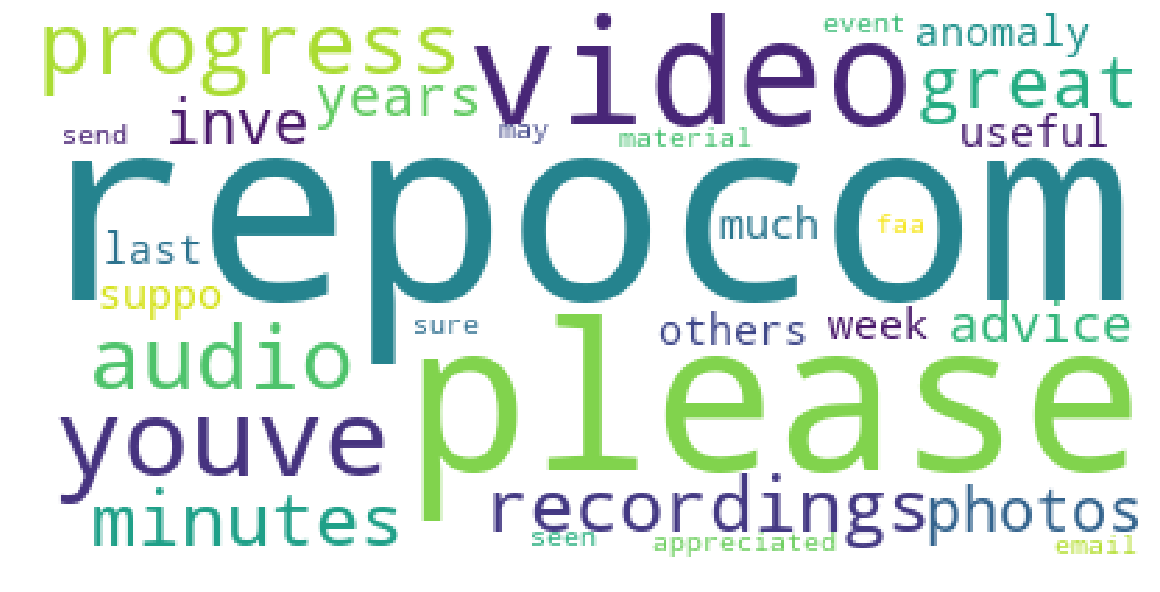

In [247]:
fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(pos_twt.pos_tweet)))



ax.axis('off')
ax.imshow(wcp)

### Negative tweets about Tesla?

In [464]:
ng_twt =pd.DataFrame()

In [465]:
for i, row in elon_Tesla.iterrows():
    if row['tb_score'] < 0:
        ng_twt.loc[i, 'neg_tweet'] = row['cleaned_tweets']

In [466]:
ng_twt = ng_twt.reset_index(drop=True)

In [467]:
ng_twt

neg_tweet
0  fredericlambert almost there we are just being...

In [468]:
ng_twt.head()

neg_tweet
0  fredericlambert almost there we are just being...

In [469]:
ng_twt.count()

neg_tweet    1
dtype: int64

### Elon had 9 positive tweets and only one negative tweet about Tesla. 

## Analyzing Spacex Tweets:

In [470]:
elon_spacex = elon[elon.Tweet.str.contains("spacex")]

In [486]:
elon_spacex.head(40)

row ID                                              Tweet  \
868    Row868             spacex's photo https://t.co/ImEDAut3nI   
1238  Row1238  This will be under /r/spacex, not the general ...   
1391  Row1391  RT @SpaceX: If you have audio, photos or video...   
1397  Row1397  Support & advice from @NASA, @FAA, @AFPAA & ot...   
1539  Row1539  RT @Eddy_Jahn: @spacex @elonmusk Not sure if y...   
2055  Row2055  RT @WSJLife: Supermodel @KarlieKloss blasts of...   
2306  Row2306  RT @westcoastbill: an illustrated guide from ....   
2424  Row2424  @FormulaSAE Contact Steve Davis at Hyperloop@s...   

                     Time   Retweet from  \
868   2017-02-18 10:26:19            NaN   
1238  2016-10-23 22:05:33            NaN   
1391  2016-09-09 19:22:53         SpaceX   
1397  2016-09-09 10:46:43            NaN   
1539  2016-07-11 10:33:29      Eddy_Jahn   
2055  2015-12-04 17:00:07        WSJLife   
2306  2015-04-13 21:24:32  westcoastbill   
2424  2015-01-15 22:29:30            NaN   

                                  Tweet_cleaned_with_at  Year  Month  Day  \
868                    spacexs photo httpstcoimedaut3ni  2017      2   18   
1238  this will be under rspacex not the general ama...  2016     10   23   
1391  rt @spacex if you have audio photos or videos ...  2016      9    9   
1397  support  advice from @nasa @faa @afpaa  others...  2016      9    9   
1539  rt @eddyjahn @spacex @elonmusk not sure if you...  2016      7   11   
2055  rt @wsjlife supermodel @karliekloss blasts off...  2015     12    4   
2306  rt @westcoastbill an illustrated guide from @p...  2015      4   13   
2424  @formulasae contact steve davis at hyperloop@s...  2015      1   15   

      Hour              AM_PM       DOW        Date  \
868     10  Morning-Afternoon  Saturday  2017-02-18   
1238    22            Evening    Sunday  2016-10-23   
1391    19            Evening    Friday  2016-09-09   
1397    10  Morning-Afternoon    Friday  2016-09-09   
1539    10  Morning-Afternoon    Monday  2016-07-11   
2055    17  Morning-Afternoon    Friday  2015-12-04   
2306    21            Evening    Monday  2015-04-13   
2424    22            Evening  Thursday  2015-01-15   

                              Tweet_without_http_and_at  \
868                                      spacex's photo   
1238  This will be under /r/spacex, not the general ...   
1391  RT If you have audio, photos or videos of our ...   
1397  Support & advice from @FAA, & others much appr...   
1539  RT @spacex Not sure if you've seen this, but g...   
2055  RT Supermodel blasts off to the future at @spa...   
2306  RT an illustrated guide from .@popmech for tod...   
2424        Contact Steve Davis at Hyperloop@spacex.com   

                                         cleaned_tweets  tb_score  
868                                       spacexs photo     0.000  
1238  this will be under rspacex not the general ama...     0.050  
1391  rt if you have audio photos or videos of our a...     0.150  
1397  support  advice from faa  others much apprecia...     0.200  
1539  rt spacex not sure if youve seen this but grea...     0.275  
2055  rt supermodel blasts off to the future at spac...     0.000  
2306  rt an illustrated guide from popmech for today...     0.000  
2424          contact steve davis at hyperloopspacexcom     0.000

#### Positive Tweets about Spacex

In [472]:
pos_spacex_twt =pd.DataFrame()

In [473]:
for i, row in elon_spacex.iterrows():
    if row['tb_score'] > 0:
        pos_spacex_twt.loc[i, 'pos_tweet'] = row['cleaned_tweets']

In [474]:
pos_spacex_twt = pos_spacex_twt.reset_index(drop=True)

In [475]:
pos_spacex_twt.head(10)

pos_tweet
0  this will be under rspacex not the general ama...
1  rt if you have audio photos or videos of our a...
2  support  advice from faa  others much apprecia...
3  rt spacex not sure if youve seen this but grea...

In [231]:
pos_spacex_twt.count()

pos_tweet    3
dtype: int64

#### Negative Tweets about Spacex

In [487]:
neg_spacex_twt =pd.DataFrame()

In [489]:
for i, row in elon_spacex.iterrows():
    if row['tb_score'] < 0:
        neg_spacex_twt.loc[i, 'neg_tweet'] = row['cleaned_tweets']

In [490]:
neg_spacex_twt = neg_spacex_twt.reset_index(drop=True)

In [491]:
neg_spacex_twt.head()

Empty DataFrame
Columns: []
Index: []

In [492]:
neg_spacex_twt.count()

Series([], dtype: int64)

### Overall, Elon had 3 positive tweets and no negative tweets regarding Spacex, while he had 9 positive tweets and one negative tweet regarding Tesla. 
### The absense of negative tweets can be explained as part of Elon's Twitter account purpose. He uses his account to market his companies and promote his ideas and brands, thus it is expected that he would not tweet negatively about his own companies. 
### On the other hand, his positive tweets were relatively low as well, which could be interpreted in a way that he is also trying to be unbiase as much as possible and remain in the neutral zone, which explains why most of his tweets are with a sentiment = 0. 

### Elon has more than 16.5 million followers and he uses his Twitter Platform for sharing his ideas, but most importantly to gather feedback and critics from his customers. He takes time to reply to his customers and tries to solve the issues raised. 

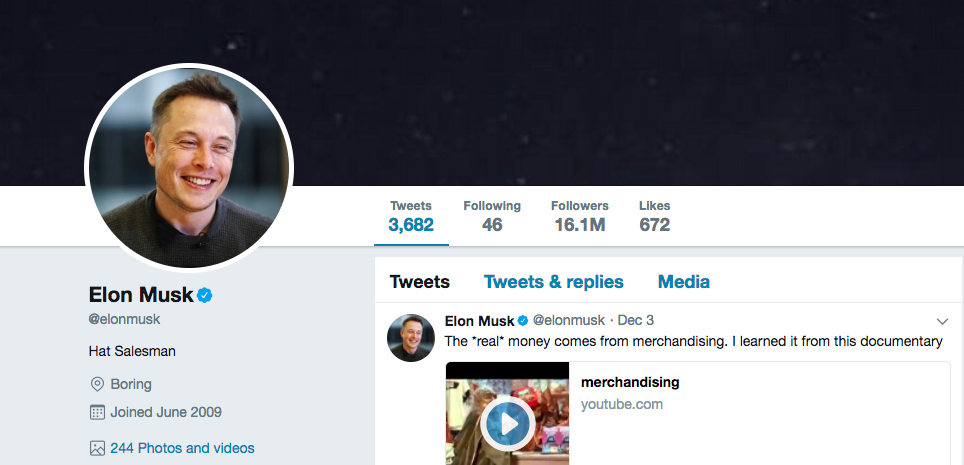

In [258]:
from IPython.core.display import Image, display
display(Image('ElonMusk.png', width = 700, unconfined=True))

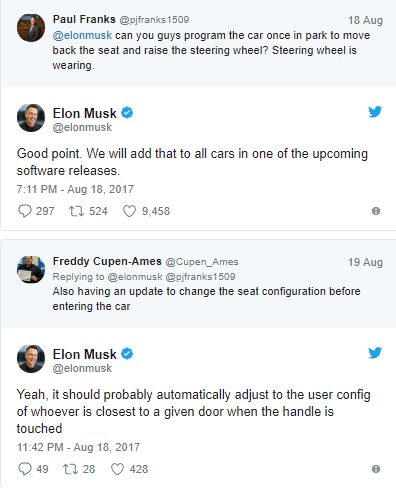

In [257]:
from IPython.core.display import Image, display
display(Image('replies.png', width = 700, unconfined=True))


## Elon Musk clearly uses Twitter and his customers' concerns seriously, and that is in my opinion one of his strongest traits that made his compaines successful. "Musk's willingness to personally respond to consumer feedback (along with Tesla's ability to push OTA updates to its cars remotely) make the car company uniquely positioned to make the owner receive personalized experience  unlike any other. 
## With such attitude and dedication to satisfy customers' needs and solve problems that could make people's lives easier and better, Elon would only see growth and further success in his business and life.  